# Factor Model of Asset Return


In [1]:
import sys
!{sys.executable} -m pip install -r requirements.txt

You are using pip version 9.0.1, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
import numpy as np
import pandas as pd
import time
import os
import quiz_helper
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (14, 8)

### data bundle

In [4]:
import os
import quiz_helper
from zipline.data import bundles

In [5]:
#os.environ['ZIPLINE_ROOT'] = os.path.join(os.getcwd(), '..', '..','data','module_4_quizzes_eod')
os.environ['ZIPLINE_ROOT'] = os.path.join(os.getcwd(),'data','module_4_quizzes_eod')
ingest_func = bundles.csvdir.csvdir_equities(['daily'], quiz_helper.EOD_BUNDLE_NAME)
bundles.register(quiz_helper.EOD_BUNDLE_NAME, ingest_func)
print('Data Registered')

Data Registered


### Build pipeline engine

In [6]:
from zipline.pipeline import Pipeline
from zipline.pipeline.factors import AverageDollarVolume
from zipline.utils.calendars import get_calendar

universe = AverageDollarVolume(window_length=120).top(500) 
trading_calendar = get_calendar('NYSE') 
bundle_data = bundles.load(quiz_helper.EOD_BUNDLE_NAME)
engine = quiz_helper.build_pipeline_engine(bundle_data, trading_calendar)

### View Data¶
With the pipeline engine built, let's get the stocks at the end of the period in the universe we're using. We'll use these tickers to generate the returns data for the our risk model.

In [7]:
universe_end_date = pd.Timestamp('2016-01-05', tz='UTC')

universe_tickers = engine\
    .run_pipeline(
        Pipeline(screen=universe),
        universe_end_date,
        universe_end_date)\
    .index.get_level_values(1)\
    .values.tolist()
    
universe_tickers

[Equity(0 [A]),
 Equity(1 [AAL]),
 Equity(2 [AAP]),
 Equity(3 [AAPL]),
 Equity(4 [ABBV]),
 Equity(5 [ABC]),
 Equity(6 [ABT]),
 Equity(7 [ACN]),
 Equity(8 [ADBE]),
 Equity(9 [ADI]),
 Equity(10 [ADM]),
 Equity(11 [ADP]),
 Equity(12 [ADS]),
 Equity(13 [ADSK]),
 Equity(14 [AEE]),
 Equity(15 [AEP]),
 Equity(16 [AES]),
 Equity(17 [AET]),
 Equity(18 [AFL]),
 Equity(19 [AGN]),
 Equity(20 [AIG]),
 Equity(21 [AIV]),
 Equity(22 [AIZ]),
 Equity(23 [AJG]),
 Equity(24 [AKAM]),
 Equity(25 [ALB]),
 Equity(26 [ALGN]),
 Equity(27 [ALK]),
 Equity(28 [ALL]),
 Equity(29 [ALLE]),
 Equity(30 [ALXN]),
 Equity(31 [AMAT]),
 Equity(32 [AMD]),
 Equity(33 [AME]),
 Equity(34 [AMG]),
 Equity(35 [AMGN]),
 Equity(36 [AMP]),
 Equity(37 [AMT]),
 Equity(38 [AMZN]),
 Equity(39 [ANDV]),
 Equity(40 [ANSS]),
 Equity(41 [ANTM]),
 Equity(42 [AON]),
 Equity(43 [AOS]),
 Equity(44 [APA]),
 Equity(45 [APC]),
 Equity(46 [APD]),
 Equity(47 [APH]),
 Equity(48 [ARE]),
 Equity(49 [ARNC]),
 Equity(50 [ATVI]),
 Equity(51 [AVB]),
 Equity(

In [8]:
len(universe_tickers)

490

In [9]:
from zipline.data.data_portal import DataPortal

data_portal = DataPortal(
    bundle_data.asset_finder,
    trading_calendar=trading_calendar,
    first_trading_day=bundle_data.equity_daily_bar_reader.first_trading_day,
    equity_minute_reader=None,
    equity_daily_reader=bundle_data.equity_daily_bar_reader,
    adjustment_reader=bundle_data.adjustment_reader)

## Get pricing data helper function

In [10]:
from quiz_helper import get_pricing

## get pricing data into a dataframe

In [11]:
returns_df = \
    get_pricing(
        data_portal,
        trading_calendar,
        universe_tickers,
        universe_end_date - pd.DateOffset(years=5),
        universe_end_date)\
    .pct_change()[1:].fillna(0) #convert prices into returns

returns_df

,Equity(0 [A]),Equity(1 [AAL]),Equity(2 [AAP]),Equity(3 [AAPL]),Equity(4 [ABBV]),Equity(5 [ABC]),Equity(6 [ABT]),Equity(7 [ACN]),Equity(8 [ADBE]),Equity(9 [ADI]),...,Equity(481 [XL]),Equity(482 [XLNX]),Equity(483 [XOM]),Equity(484 [XRAY]),Equity(485 [XRX]),Equity(486 [XYL]),Equity(487 [YUM]),Equity(488 [ZBH]),Equity(489 [ZION]),Equity(490 [ZTS])
2011-01-07 00:00:00+00:00,0.008437,0.014230,0.026702,0.007146,0.000000,0.001994,0.004165,0.001648,-0.007127,-0.005818,...,-0.001838,-0.005619,0.005461,-0.004044,-0.013953,0.000000,0.012457,-0.000181,-0.010458,0.000000
2011-01-10 00:00:00+00:00,-0.004174,0.006195,0.007435,0.018852,0.000000,-0.005714,-0.008896,-0.008854,0.028714,0.002926,...,0.000947,0.007814,-0.006081,0.010466,0.009733,0.000000,0.001440,0.007784,-0.017945,0.000000
2011-01-11 00:00:00+00:00,-0.001886,-0.043644,-0.005927,-0.002367,0.000000,0.009783,-0.002067,0.013717,0.000607,0.008753,...,0.001314,0.010179,0.007442,0.007351,0.006116,0.000000,-0.006470,0.035676,0.007467,0.000000
2011-01-12 00:00:00+00:00,0.017254,-0.008237,0.013387,0.008133,0.000000,-0.005979,-0.001011,0.022969,0.017950,0.000257,...,0.004986,0.015666,0.011763,0.027182,0.004386,0.000000,0.002631,0.014741,-0.011903,0.000000
2011-01-13 00:00:00+00:00,-0.004559,0.000955,0.003031,0.003657,0.000000,0.014925,-0.004451,-0.000400,-0.005719,-0.005012,...,0.030499,-0.003217,0.001694,0.000547,-0.018235,0.000000,-0.005084,-0.004665,-0.009178,0.000000
2011-01-14 00:00:00+00:00,0.003439,-0.009156,0.003022,0.008106,0.000000,0.001395,-0.010111,0.002590,0.012283,0.019827,...,0.026607,0.025894,0.014743,-0.000287,0.026494,0.000000,-0.021661,0.005949,0.033177,0.000000
2011-01-18 00:00:00+00:00,0.034254,-0.062085,-0.004286,-0.022474,0.000000,0.020889,0.006621,0.006998,0.011542,0.032645,...,0.001678,0.002501,0.011163,0.011589,0.006044,0.000000,0.029453,0.006998,-0.008534,0.000000
2011-01-19 00:00:00+00:00,-0.010224,-0.008929,0.008754,-0.005314,0.000000,-0.017144,0.002753,-0.002962,-0.007899,-0.020575,...,-0.014834,-0.023590,-0.005968,-0.019899,-0.012847,0.000000,0.000818,-0.004098,-0.018433,0.000000
2011-01-20 00:00:00+00:00,-0.008496,0.021953,-0.004732,-0.018189,0.000000,0.004794,0.013322,0.018713,-0.012386,-0.002818,...,-0.024512,0.007744,-0.006261,-0.000841,-0.033798,0.000000,-0.013182,-0.001612,-0.007972,0.000000
2011-01-21 00:00:00+00:00,0.007873,-0.041038,0.005544,-0.017911,0.000000,0.010642,-0.000853,-0.001952,-0.006569,-0.004113,...,0.000000,0.000615,0.015825,-0.003048,-0.000872,0.000000,-0.007590,0.009325,0.024020,0.000000


## Let's look at one stock

 Let's look at this for just one stock.  We'll pick AAPL in this example.

In [13]:
aapl_col = returns_df.columns[3]
asset_return = returns_df[aapl_col]
asset_return = asset_return.rename('asset_return')
asset_return.head()

2011-01-07 00:00:00+00:00    0.007146
2011-01-10 00:00:00+00:00    0.018852
2011-01-11 00:00:00+00:00   -0.002367
2011-01-12 00:00:00+00:00    0.008133
2011-01-13 00:00:00+00:00    0.003657
Freq: C, Name: asset_return, dtype: float64

## Factor returns
Let's make up a "factor" by taking an average of all stocks in our list.  You can think of this as an equal weighted index of the 490 stocks, kind of like a measure of the "market".  We'll also make another factor by calculating the median of all the stocks.  These are mainly intended to help us generate some data to work with.  We'll go into how some common risk factors are generated later in the lessons.

Also note that we're setting axis=1 so that we calculate a value for each time period (row) instead of one value for each column (assets).

In [20]:
factor_return_1 = returns_df.mean(axis=1)
factor_return_1.head()

2011-01-07 00:00:00+00:00    0.000183
2011-01-10 00:00:00+00:00    0.000374
2011-01-11 00:00:00+00:00    0.003278
2011-01-12 00:00:00+00:00    0.007725
2011-01-13 00:00:00+00:00   -0.000927
Freq: C, dtype: float64

In [19]:
factor_return_2 = returns_df.median(axis=1)
factor_return_2.head()

2011-01-07 00:00:00+00:00   -0.000698
2011-01-10 00:00:00+00:00    0.000000
2011-01-11 00:00:00+00:00    0.001572
2011-01-12 00:00:00+00:00    0.006286
2011-01-13 00:00:00+00:00   -0.000562
Freq: C, dtype: float64

## Factor exposures

Factor exposures refer to how "exposed" a stock is to each factor.  We'll get into this more later.  For now, just think of this as one number for each stock, for each of the factors.

In [21]:
from sklearn.linear_model import LinearRegression

In [23]:
"""
You can run these in separate cells to see each step in detail
But for now, just assume that we're calculating a number for each 
stock, for each factor, which represents how "exposed" each stock is
to each factor. 
We'll discuss how factor exposure is calculated later in the lessons.
"""
lr = LinearRegression()
X = np.array([factor_return_1.values,factor_return_2.values]).T
y = np.array(asset_return.values)
lr.fit(X,y)
factor_exposure_1 = lr.coef_[0]
factor_exposure_2 = lr.coef_[1]
print(factor_exposure_1,factor_exposure_2)

1.3510153415198427 -0.5835319821050855


## Quiz 1 Contribution of Factors

The sum of the products of factor exposure times factor return is the contribution of the factors.  It's also called the "common return." calculate the common return of AAPL, given the two factor exposures and the two factor returns.

## Answer 1

In [24]:
# Calculate the contribution of the two factors to the return of this example asset
common_return = (factor_exposure_1 * factor_return_1) + (factor_exposure_2 * factor_return_2)
common_return = common_return.rename('common_return')
common_return

2011-01-07 00:00:00+00:00    0.000654
2011-01-10 00:00:00+00:00    0.000506
2011-01-11 00:00:00+00:00    0.003510
2011-01-12 00:00:00+00:00    0.006769
2011-01-13 00:00:00+00:00   -0.000924
2011-01-14 00:00:00+00:00    0.006824
2011-01-18 00:00:00+00:00    0.002738
2011-01-19 00:00:00+00:00   -0.010509
2011-01-20 00:00:00+00:00   -0.003016
2011-01-21 00:00:00+00:00    0.001285
2011-01-24 00:00:00+00:00    0.005477
2011-01-25 00:00:00+00:00    0.000615
2011-01-26 00:00:00+00:00    0.007008
2011-01-27 00:00:00+00:00    0.005732
2011-01-28 00:00:00+00:00   -0.013571
2011-01-31 00:00:00+00:00    0.007018
2011-02-01 00:00:00+00:00    0.011404
2011-02-02 00:00:00+00:00   -0.001076
2011-02-03 00:00:00+00:00    0.003991
2011-02-04 00:00:00+00:00    0.005198
2011-02-07 00:00:00+00:00    0.004144
2011-02-08 00:00:00+00:00    0.004450
2011-02-09 00:00:00+00:00   -0.002102
2011-02-10 00:00:00+00:00    0.002426
2011-02-11 00:00:00+00:00    0.005472
2011-02-14 00:00:00+00:00    0.001809
2011-02-15 0

## Quiz 2 Specific Return
The specific return is the part of the stock return that isn't explained by the factors.  So it's the actual return minus the common return.  
Calculate the specific return of the stock.

## Answer 2

In [25]:
# TODO: calculate the specific return of this asset
specific_return = asset_return - common_return 

specific_return = specific_return.rename('specific_return')
specific_return.head()

2011-01-07 00:00:00+00:00    0.006492
2011-01-10 00:00:00+00:00    0.018346
2011-01-11 00:00:00+00:00   -0.005878
2011-01-12 00:00:00+00:00    0.001364
2011-01-13 00:00:00+00:00    0.004581
Freq: C, Name: specific_return, dtype: float64

## Visualize the common return and specific return


In [26]:
return_components = pd.concat([assetcommon_return,specific_return],axis=1)
return_components.head(2)

,common_return,specific_return
2011-01-07 00:00:00+00:00,0.000654,0.006492
2011-01-10 00:00:00+00:00,0.000506,0.018346


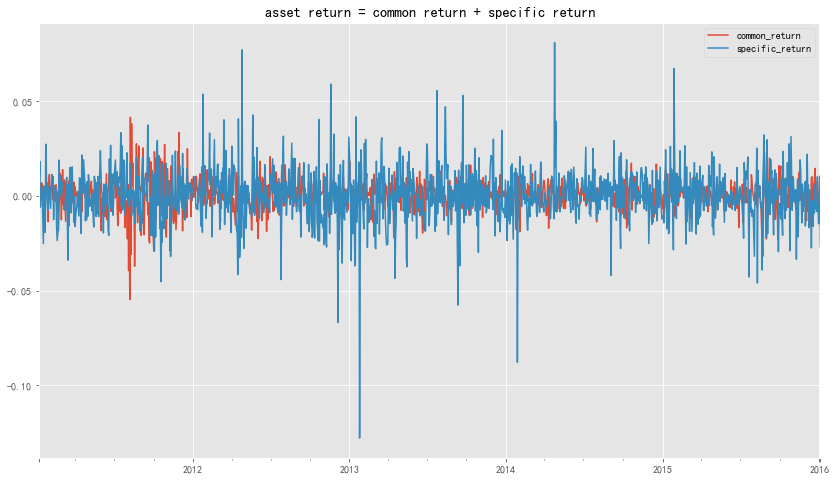

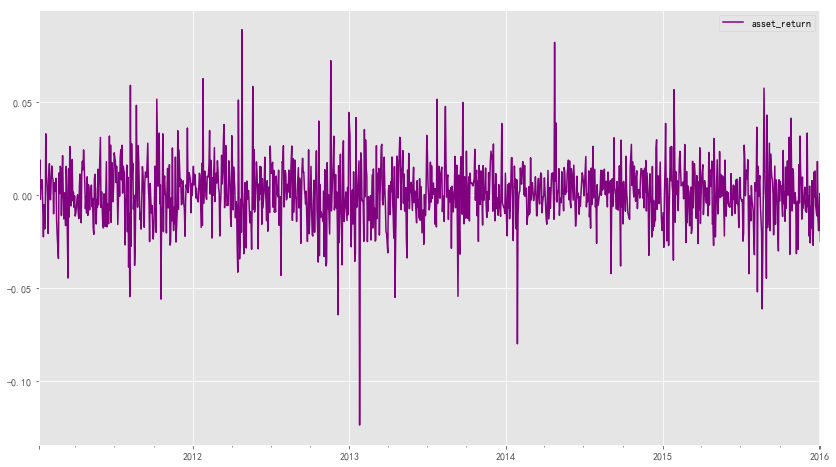

In [27]:
return_components.plot(title="asset return = common return + specific return");
pd.DataFrame(asset_return).plot(color='purple');

## Solution

[Solution notebook](factor_model_asset_return_solution.ipynb)